In [5]:
import numpy as np 
import matplotlib.pyplot as plt 

def get_sin_cos(theta):
    return ( np.sin(theta), np.cos(theta))

def rad2deg(rad):
    return np.array(rad) * (180.0/np.pi)

def deg2rad(deg):
    return np.array(deg) * (np.pi/180.0)

def quaternionFromEuler(attitude_xyz):
    c1 = np.cos( 0.5 * attitude_xyz[0])
    s1 = np.sin( 0.5 * attitude_xyz[0])
    c2 = np.cos( 0.5 * attitude_xyz[1])
    s2 = np.sin( 0.5 * attitude_xyz[1])
    c3 = np.cos( 0.5 * attitude_xyz[2])
    s3 = np.sin( 0.5 * attitude_xyz[2])

    q0 = c1*c2*c3 + s1*s2*s3
    q1 = s1*c2*c3 - c1*s2*s3
    q2 = c1*s2*c3 + s1*c2*s3
    q3 = c1*c2*s3 - s1*s2*c3

    return np.array([q0,q1,q2,q3])


def eulerXYZFromQuaternion(quat):
    q0 = quat[0]
    q1 = quat[1]
    q2 = quat[2]
    q3 = quat[3]

    r11 = q0*q0 + q1*q1 - q2*q2 - q3 * q3
    r12 = 2.0 * (q1*q2 + q0*q3)
    r13 = 2.0 * (q1*q3 - q0*q2)
    r23 = 2.0 * (q2*q3 + q0*q1)
    r33 = q0*q0 - q1*q1 - q2*q2 + q3*q3

    phi = np.arctan2(r23, r33)
    the = -np.arcsin(r13)
    psi = np.arctan2(r12, r11)

    return np.array([phi, the, psi])

def quatNorm(quat):
    q0 = quat[0]
    q1 = quat[1]
    q2 = quat[2]
    q3 = quat[3]
    return np.sqrt(q0 * q0 + q1 * q1 + q2 * q2 + q3 * q3)

def eulerIntegration(x, xdot, dt):
    return x + xdot * dt


def quaternionNormalize(quat):
    norm = quatNorm(quat)
    return quat / norm


def quaternionRates(quat, omega_body):
    q0 = quat[0]
    q1 = quat[1]
    q2 = quat[2]
    q3 = quat[3]

    W = np.array([[-q1, -q2, -q3],
                  [ q0,  q3, -q2],
                  [-q3,  q0,  q1],
                  [ q2, -q1,  q0]])
    return 0.5 * np.matmul(W, omega_body)

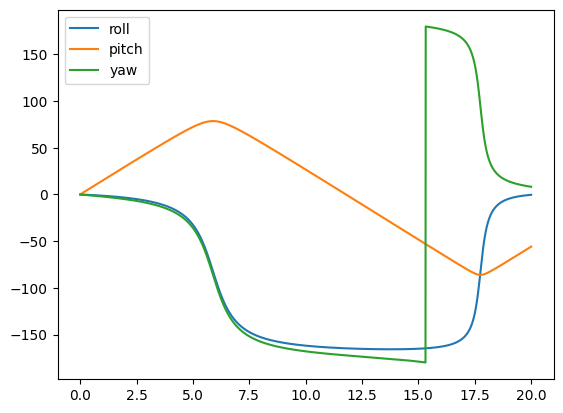

In [11]:
attitude = deg2rad([0,0,0])
omega = deg2rad([-1,15, -2.0])

q = quaternionFromEuler(attitude)

dt = 0.01
time = []
phi = []
the = []
psi = []

for t in np.arange(0, 20+dt, dt):
    q_dot = quaternionRates(q, omega)
    q = eulerIntegration(q, q_dot, dt)
    q = quaternionNormalize(q)
    attitude = eulerXYZFromQuaternion(q)

    time.append(t)
    phi.append(rad2deg(attitude[0]))
    the.append(rad2deg(attitude[1]))
    psi.append(rad2deg(attitude[2]))


plt.plot(time, phi, label="roll")
plt.plot(time, the, label="pitch")
plt.plot(time, psi, label="yaw")
plt.legend()

